## Library Imports


In [282]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import os
from statistics import mean,median,stdev

## Phones

In [283]:
phones = []

os.chdir('/Users/cogmech/Documents/Buckeye_AF/Data/text/phones')
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".txt"):
        current_frame = pd.read_csv(filename, header=None, skiprows=9,sep='\s+',error_bad_lines=False,usecols=[0, 2])
        current_frame[2] = current_frame[2].astype(str)
        current_frame[2] = current_frame[2].map(lambda x: x.lstrip('{').rstrip('};'))
        current_frame[1] = ""
        for i in range(len(current_frame)):
            if current_frame.loc[i,2].isupper() or current_frame.loc[i,2]=='nan' or :
                current_frame.loc[i,1] = 'nsl'
            else:
                current_frame.loc[i,1] = 'phone'
            #elif current_frame.loc[i,2].isupper():
            #    current_frame.loc[i,1] = 'nsl'
        
        phones.append(current_frame)

In [220]:
#phones[73]=phones[73].drop([0,1,2])
#phones[73]=phones[73].reset_index(drop=True)

#phones[18]=phones[18].drop([2871])
#phones[18]=phones[18].reset_index(drop=True)

In [327]:
#dummy end row to add to dfs
#d_row = phones[0].iloc[-1]

#for i in range(len(phones)):
#    if phones[i].iloc[-1,2] == 'phone':
#        print(i)
#        phones[i] = phones[i].append(d_row,ignore_index=True)

In [307]:
allphone_diffs = []

for k in range(len(phone_partchunks)):
    phone_diffs = []
    for i in range(len(phone_partchunks[k])):
        current_df = phone_partchunks[k][i]
        x = []
        #print(i)
        for j in range(len(current_df)-1):
            if current_df.loc[j,1] == 'phone' and current_df.loc[j+1,1] == 'phone':
                onset = current_df.loc[j,0]
                offset = current_df.loc[j+1,0]
                x.append(offset-onset)
        #threshold = median(x)+(stdev(x)*3)
        #x = [item for item in x if item < threshold]#only keep values less than 3 stdevs away
        phone_diffs.append(x)
    allphone_diffs.append(phone_diffs)
    

(array([911., 314.,  36.,  14.,   3.,   1.,   1.,   0.,   0.,   3.]),
 array([0.01356  , 0.0887552, 0.1639504, 0.2391456, 0.3143408, 0.389536 ,
        0.4647312, 0.5399264, 0.6151216, 0.6903168, 0.765512 ]),
 <a list of 10 Patch objects>)

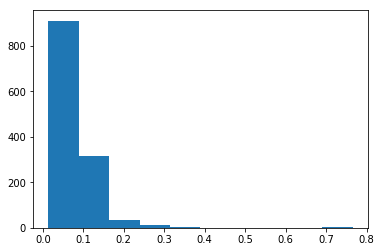

In [308]:
test = allphone_diffs[0][0]
plt.hist(test)

In [179]:
#phones[35]

In [311]:
from scipy import stats

phone_cof = []

for k in range(len(allphone_diffs)):
    x = []
    for i in range(len(allphone_diffs[k])):
        part = stats.variation(allphone_diffs[k][i])
        x.append(part)
    phone_cof.append(np.asarray(x))
    
phone_cof = np.asarray(phone_cof)
phone_cof



array([array([0.76971005, 0.65786268, 0.64565474, 0.83871758, 0.63922015,
       0.65685969, 0.58749658, 0.637353  , 0.69476627, 0.65652568,
       0.73492219]),
       array([0.66063838, 0.64660421, 0.61454936, 0.67364637, 0.66866738,
       0.60098626, 0.69660942, 0.61309498, 0.63503477, 0.69581426,
       0.65634594, 0.59248646, 0.60933031, 0.64676669, 0.592096  ,
       0.63605541, 3.01817492, 0.6066335 ]),
       array([0.6922229 , 0.71826667, 0.56332865, 0.57209146, 0.56111914,
       0.59684183, 0.56521716, 0.75635832, 0.69590345, 0.6373823 ,
       0.63074517, 0.59970373, 0.57550217, 0.75585982, 0.61936949]),
       array([0.77002341, 0.74906813, 0.75492557, 0.67010428, 0.73641125,
       0.67683946, 0.71813969, 0.59765157, 0.61705646, 0.6407208 ]),
       array([0.77484694, 0.68282441, 0.65036417, 0.6194065 , 0.68183038,
       0.72890072, 0.59768292, 0.58530567, 0.62265975, 0.60342012,
       0.72979993, 0.62599973, 0.70960829, 0.65141323, 0.68008414]),
       array([0.637032

In [181]:
#plt.scatter(range(len(phone_diffs[5])),phone_diffs[5])
#phone_diffs[8]

In [182]:
print(np.mean(phone_cof))

0.6759205418550783


In [10]:
#plt.hist(phone_cof)


## Words

In [312]:
import os

words = []


os.chdir('/Users/cogmech/Documents/Buckeye_AF/Data/text/words')
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".txt"):
        current_frame = pd.read_csv(filename, header=None, skiprows=9,sep='\s+',error_bad_lines=False,usecols=[0, 2])
        current_frame[2] = current_frame[2].map(lambda x: x.lstrip('<{').rstrip('>};'))
        current_frame[1] = ""
        for i in range(len(current_frame)):
            if current_frame.loc[i,2].islower():
                current_frame.loc[i,1] = 'word'
            else:
                current_frame.loc[i,1] = 'nsl'
        words.append(current_frame)



In [12]:
#words[1]

In [316]:
allword_diffs = []

for k in range(len(word_partchunks)):
    word_diffs = []
    for i in range(len(word_partchunks[k])):
        current_df = word_partchunks[k][i]
        x = []
        for j in range(len(current_df)):
            if current_df.loc[j,1] == 'word' and current_df.loc[j+1,1] == 'word':
                onset = current_df.loc[j,0]
                offset = current_df.loc[j+1,0]
                x.append(offset-onset)
            
        #threshold = median(x)+(stdev(x)*3)
        #x = [item for item in x if item < threshold]        
        word_diffs.append(x)
    allword_diffs.append(word_diffs)

(array([69., 90., 68., 47., 24., 21., 11.,  8., 10.,  4.]),
 array([0.030512, 0.108826, 0.18714 , 0.265454, 0.343768, 0.422082,
        0.500396, 0.57871 , 0.657024, 0.735338, 0.813652]),
 <a list of 10 Patch objects>)

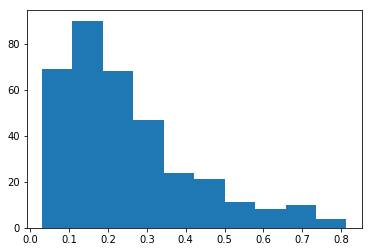

In [317]:
test = allword_diffs[0][0]
plt.hist(test)



In [17]:
from scipy import stats

word_cof = []

for i in range(len(word_diffs)):
    x = stats.variation(word_diffs[i])
    word_cof.append(x)
    
word_cof = np.asarray(word_cof)
word_cof

array([0.66035523, 0.5934143 , 0.6353702 , 0.6396879 , 0.66747775,
       0.639498  , 0.72370701, 0.64631789, 0.67566764, 0.64100423,
       0.65536201, 0.6152457 , 0.65319292, 0.60265579, 0.59382494,
       1.38359669, 0.58748066, 0.60601424, 0.59088614, 0.67508625,
       0.60112848, 4.33592121, 0.63758787, 0.65741996, 0.64805632,
       0.69048537, 0.68282962, 0.63066647, 0.62857247, 0.60023294,
       0.59511755, 0.60028614, 0.60873061, 0.6226667 , 0.56339285,
       0.59080425, 0.57882778, 0.58353098, 0.57420593, 0.62318764,
       0.58258059, 0.62363915, 0.62414704, 0.62166003, 0.60359205,
       0.61161769, 0.58595675, 0.58745687, 0.60165526, 0.59307367,
       0.60112374, 0.61125571, 0.60491669, 0.68811048, 0.73022724,
       0.69580313, 0.65690899, 2.06840396, 0.69304157, 0.74542908,
       0.70334078, 0.60510794, 0.55169517, 0.60240721, 0.58054018,
       0.60519858, 0.58973884, 0.58716631, 0.60299894, 0.60091252,
       0.58246352, 0.54534598, 0.61464573, 0.61238634, 0.59487

In [18]:
print(np.mean(word_cof))

0.6789646079399828


In [16]:
idx = []

for i in range(len(word_cof)):
    if word_cof[i] > 8:
        idx.append(i)
idx

[7, 8, 9, 12, 13]

In [15]:
#word_cof = np.delete(word_cof,[7,8,9,12,13])
#word_cof

In [16]:
#plt.hist(word_cof)

## Breath Group

In [267]:
#test = words[0]
#test.loc[220:270,:]

In [318]:

for k in range(len(word_partchunks)):
    for i in range(len(word_partchunks[k])):
        current_frame = word_partchunks[k][i]
        current_frame['bgs'] = ""
        #print(i)
        for j in range(len(current_frame)):
            if current_frame.loc[j,1] == 'word' and current_frame.loc[j+1,1] == 'word':
                current_frame.loc[j,'bgs'] = 'in'
            else:
                current_frame.loc[j,'bgs'] = 'out'

In [319]:
word_partchunks[0][0]

0     1             2  bgs
0    0.102385   NaN           NaN  out
1     B_TRANS   NaN           NaN  out
2         nsl   NaN           NaN  out
3    0.102385   nsl       B_TRANS  out
4     4.27574   nsl           SIL  out
5     8.51352   nsl         NOISE  out
6     32.2166   nsl          IVER  out
7      32.622  word          okay  out
8      37.129   nsl          IVER  out
9      38.123   nsl      VOCNOISE  out
10     44.618   nsl          IVER  out
11    44.9468  word            um  out
12    45.3557   nsl           SIL  out
13    45.5015  word           i'm  out
14    46.2669   nsl  EXCLUDE-name  out
15    46.4232   nsl      VOCNOISE  out
16    46.6162   nsl           SIL  out
17    47.3078   nsl      EXT-I've  out
18    47.5309  word         lived   in
19     47.659  word            in   in
20    48.1445  word      columbus   in
21     48.312  word            my   in
22    48.7371  word        entire   in
23    49.0219  word          life   in
24    49.2877  word        thirty   in
25     49.506  word          four   in
26    50.1712  word         years  out
27    50.2397   nsl      VOCNOISE  out
28     50.557  word            um   in
29    50.7645  word          born   in
..        ...   ...           ...  ...
495   237.955   nsl           SIL  out
496   238.181  word            um  out
497   238.505   nsl      VOCNOISE  out
498   238.648  word           his   in
499   238.982  word           dad   in
500   239.295  word         still   in
501   239.606  word         lives   in
502   239.705  word            in   in
503   239.863  word         grove   in
504   240.158  word          city   in
505    240.31  word            my   in
506   240.607  word           mom   in
507    240.81  word         lives   in
508   241.184  word         still  out
509   241.495   nsl           SIL  out
510   241.645  word            at   in
511   241.925  word           our   in
512   242.025  word           old   in
513   242.325  word        family   in
514   242.673  word         house   in
515   242.834  word         there   in
516   242.922  word            on   in
517   242.997  word           the   in
518   243.519  word      westside  out
519   243.986   nsl      VOCNOISE  out
520   244.117  word           and   in
521    244.26  word            we   in
522    244.77  word         moved  out
523   244.859   nsl           SIL  out
524   623.108   nsl       E_TRANS  out

[525 rows x 4 columns]

In [320]:
allbg_diffs = []

for k in range(len(word_partchunks)):
    bg_diffs = []
    for i in range(len(word_partchunks[k])):
        current_df = word_partchunks[k][i]
        x = []
        for j in range(len(current_df)):
            #print(i)
            if current_df.loc[j,'bgs'] == 'in' and current_df.loc[j-1,'bgs'] == 'out':
                onset = current_df.loc[j,0]
            
            elif current_df.loc[j,'bgs'] == 'in' and current_df.loc[j+1,'bgs'] == 'out':
                offset = current_df.loc[j,0]
            
                x.append(offset-onset)
            
        #threshold = median(x)+(stdev(x)*3)
        #x = [item for item in x if item < threshold]        
        bg_diffs.append(x)
    allbg_diffs.append(bg_diffs)
        

(array([ 8.,  7., 12.,  2.,  4.,  1.,  1.,  1.,  2.,  3.]),
 array([0.064414 , 0.5526734, 1.0409328, 1.5291922, 2.0174516, 2.505711 ,
        2.9939704, 3.4822298, 3.9704892, 4.4587486, 4.947008 ]),
 <a list of 10 Patch objects>)

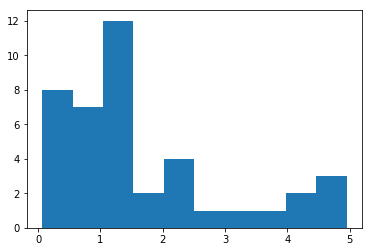

In [321]:
test = allbg_diffs[0][0]
plt.hist(test)

In [22]:
#breath_diffs[4]

In [326]:
allbreath_cof = []

for k in range(len(allbg_diffs)):
    breath_cof = []
    for i in range(len(allbg_diffs[k])):
        x = stats.variation(allbg_diffs[k][i])
        breath_cof.append(x)
    allbreath_cof.append(np.asarray(breath_cof))
    
allbreath_cof = np.asarray(allbreath_cof)
allbreath_cof

array([array([0.81862513, 0.80537272, 0.7178176 , 0.7924226 , 0.81073065,
       0.97805443, 0.64775625, 0.77970743, 0.93352193, 0.70828241,
       1.24867868]),
       array([0.96308661, 0.86307496, 1.05321807, 0.68059895, 0.92547337,
       0.87704981, 1.09323983, 0.75854816, 0.82073181, 0.91247731,
       0.74199334, 0.6881269 , 1.03005   , 0.86623277, 0.66061567,
       0.7936931 , 0.84536314, 0.76484994]),
       array([1.00947607, 1.06135879, 0.80244148, 0.71512087, 0.90054151,
       1.15484991, 0.74882176, 0.86208391, 0.76663504, 0.71998066,
       0.87529079, 0.80798903, 0.77035107, 1.11867014, 1.02470439]),
       array([0.65718206, 0.74037465, 0.61278187, 0.61474165, 0.63144953,
       0.8807083 , 0.6766764 , 0.85589369, 0.86129322, 0.63218707]),
       array([0.72785226, 0.83797456, 0.72328341, 0.76221532, 0.93774998,
       0.93789586, 0.85050099, 0.81345518, 0.78316853, 0.80216537,
       1.03639883, 0.99871406, 0.87150567, 0.69278662, 0.85076886]),
       array([0.844885

In [24]:
print(np.mean(breath_cof))

0.8375982835034297


## Syllables

In [28]:
###CREATE LIST OF FRAMES FROM PHONES INCLUDING ONLY PHONE TRANSCRIPTIONS###
#should also follow that these are phones following phones due to error in transcription between phone labels and NSLs
syllables = []

for i in range(len(phones)):
    current_frame = phones[i]
    current_frame = current_frame[current_frame[1] == 'phone']
    current_frame.reset_index(drop=True, inplace=True)
    syllables.append(current_frame)


In [122]:
################################################
#REGEX check which files have the + phone label
for i in range(len(syllables)):
    current_df = syllables[i]
    ph_col = current_df[2]
    #print(i)
    checklist = ph_col.str.contains(pat='^no$',regex=True).tolist()
    #print(checklist)
    if True in checklist:
        print(i)
################################################

64


In [164]:
#phones[0]

In [284]:
#create dictionary of unique phone labels and sonority values
#Sonority Levels 1-8
#[Stops,Affricates,Fricatives,Nasals,Liquids,Glides,Syllabified Nasals,Vowels]

ph_dict = {'a':8,'aa':8,'aa+1':8,'aan':7,'ae':8,'ae+1':8,'aen':7,'ah':8,'ah+1':8,'ah+1n':7,'ahn':7,'ao':8,'ao+1':8,'aon':7,'aw':8,'aw+1':8,
           'awn':7,'ay':8,'ay+1':8,'ayn':7,'b':1,'ch':2,'d':1,'dh':1,'dx':1,'eh':8,'eh+1':8,'ehn':7,'el':7,'em':7,'en':7,'eng':7,'er':5,'ern':7,
           'ey':8,'ey+1':8,'eyn':7,'f':3,'g':1,'h':3,'hh':3,'i':8,'id':7,'ih':8,'ih+1':8,'ihn':7,'iy':8,'iy+1':8,'iyn':7,'j':2,'jh':2,'k':1,'l':5,
           'm':4,'n':4,'ng':4,'no':7,'nx':1,'ow':8,'ow+1':8,'own':7,'oy':8,'oy+1':8,'oyn':7,'p':1,'r':5,'s':3,'sh':3,'t':1,'th':3,'tq':1,
           'uh':8,'uh+1':8,'uhn':7,'uw':8,'uw+1':8,'uwn':7,'v':3,'w':6,'y':6,'z':3,'zh':2}

In [285]:
#duplicate phone label list and use map function 
for i in range(len(phones)):
    current_frame = phones[i]
    current_frame['sonority'] = current_frame[2]
    current_frame['sonority'] = current_frame['sonority'].map(ph_dict)

In [328]:
##Visualize sonority value examples##
test = syllables[3]
s = test.loc[50:100,'sonority']
s.plot.line()

AttributeError: 'list' object has no attribute 'loc'

In [298]:
###Use Sonority Values for Labels###

# iterate accross phone files
for k in range(len(phone_partchunks)):
    for i in range(len(phone_partchunks[k])):
        df = phone_partchunks[k][i]
        df['labels'] = ""
        #print(i)
        #iterate over each data frame
        for j in range(len(df)-1):
            #select only phones that are adjacent to other phones
            if df.loc[j,1] == 'phone' and df.loc[j+1,1] == 'phone':
                #label starts and stop of adjacent phones
                if df.loc[j,1] == 'phone' and df.loc[j-1,1] == 'nsl':
                    df.loc[j,'labels'] = 'start'
                
                if df.loc[j,1] == 'phone' and df.loc[j+2,1] == 'nsl':
                    df.loc[j+1,'labels'] = 'stop'
                ###compare sonority values
                #identfy troughs
                elif df.loc[j,'sonority'] < df.loc[j-1,'sonority'] and df.loc[j,'sonority'] < df.loc[j+1,'sonority']:
                    df.loc[j,'labels'] = 'trough'
                
                #identify valleys
                elif df.loc[j,'sonority'] == df.loc[j+1,'sonority'] and df.loc[j,'sonority'] < df.loc[j-1,'sonority']:
                    df.loc[j,'labels'] = 'vs'
                
                    #capture ve next to slopes 
                    if df.loc[j+1,'sonority'] > df.loc[j+2,'sonority']:
                        df.loc[j+1,'labels'] = 've'
                    
                    
                if df.loc[j,'sonority'] == df.loc[j-1,'sonority'] and df.loc[j,'sonority'] < df.loc[j+1,'sonority']:
                    df.loc[j,'labels'] = 've'
                
                    #capture vs on flat peaks
                    if df.loc[j-1,'sonority'] > df.loc[j-2,'sonority']:
                        df.loc[j-1,'labels'] = 'vs'
                
                
            #how to deal with possible START valleys or STOP valleys
            #how to deal with long valleys that then slope down or up
            
                    
            
            
    
            
            
           
            
     

In [299]:
##Use Labels to do onset/offset diffs##

#define syllables list of DFs containing identified labels only
syllables = []
label_types = ['start','stop','trough','vs','ve']

allsyll_diffs = []
onset_labels = ['start','ve']
offset_labels = ['stop','vs']

for k in range(len(phone_partchunks)):
    x = []
    for i in range(len(phone_partchunks[k])):
        df = phone_partchunks[k][i]
        df = df[df['labels'].isin(label_types)]
        df.reset_index(drop=True, inplace=True)
        x.append(df)
    syllables.append(x)
    

for k in range(len(syllables)):
    syll_diffs = []
    for i in range(len(syllables[k])):
        df = syllables[k][i]
        x = []
    
        for j in range(len(df)):
            if df.loc[j,'labels'] in onset_labels:
                onset = df.loc[j,0]
            
                #print(df.loc[j,2])
            
            elif df.loc[j,'labels'] == 'stop':
                offset = df.loc[j,0]
                x.append(offset-onset)
            
            elif df.loc[j,'labels'] == 'vs':
                offset = df.loc[j+1,0]
                x.append(offset-onset)
                #print(df.loc[j,2])
                #print('-----')
            
            elif df.loc[j,'labels'] == 'trough':
                offset = df.loc[j+1,0]
                x.append(offset-onset)
                #print(df.loc[j,2])
                #print('-----')
                onset = df.loc[j+1,0]
            
                #need to capture CVC, CV might be either missing or over lapping 
                #all stops will use its onset so clipping off to a CV
                #when valley start is identified use next phone as offset index, same as cvc
                #leave s valley
                #what to do when there's two valleys next to each other?
            
        syll_diffs.append(x)
    allsyll_diffs.append(syll_diffs)

allsyll_diffs

[[[0.24545200000000023,
   0.1263669999999948,
   0.8333159999999964,
   0.324105000000003,
   0.22475299999999976,
   0.19427799999999706,
   0.19459800000000627,
   0.39394399999999763,
   0.19866700000000037,
   0.13058199999999687,
   0.26222000000000634,
   0.2850219999999979,
   0.19278400000000318,
   0.563453999999993,
   0.0,
   0.2963059999999942,
   0.13560800000000484,
   0.27257399999999876,
   0.06577000000000055,
   0.022376000000001284,
   0.24341700000000088,
   0.0711949999999959,
   0.5972650000000002,
   0.3011720000000011,
   0.0,
   0.11190200000000772,
   0.3641890000000032,
   0.7181319999999971,
   0.0,
   0.2569780000000037,
   0.09424800000000033,
   0.15662900000000235,
   0.08611099999999539,
   0.13029399999999214,
   0.0832900000000052,
   0.312578000000002,
   0.1613749999999996,
   0.3440219999999954,
   0.19027600000000433,
   0.18713999999999942,
   0.438016999999995,
   0.0,
   0.15144599999999286,
   0.25517099999999004,
   0.22000000000000597,
   0

(array([177., 180.,  90.,  31.,  15.,   3.,   3.,   1.,   2.,   1.]),
 array([0.      , 0.122387, 0.244774, 0.367161, 0.489548, 0.611935,
        0.734322, 0.856709, 0.979096, 1.101483, 1.22387 ]),
 <a list of 10 Patch objects>)

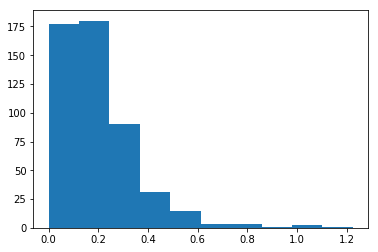

In [302]:

plt.hist(allsyll_diffs[0][0])

In [305]:
syll_cof = []

for k in range(len(allsyll_diffs)):
    x = []
    for i in range(len(allsyll_diffs[k])):
        part = stats.variation(allsyll_diffs[k][i])
        x.append(part)
        
    syll_cof.append(np.asarray(x))
    
syll_cof = np.asarray(syll_cof)
syll_cof

array([array([0.80475895, 0.76295561, 0.72138157, 0.82703785, 0.7012984 ,
       0.76169563, 0.65712332, 0.70332861, 0.71759939, 0.73702323,
       0.73487488]),
       array([0.75210924, 0.76826696, 0.69026198, 0.73105524, 0.76511848,
       0.66724622, 0.82516218, 0.6682431 , 0.64181068, 0.75190037,
       0.72680302, 0.67555438, 0.6718775 , 0.71465293, 0.70486632,
       0.73475316, 1.94713356, 0.68421705]),
       array([0.76424826, 0.69671347, 0.72314378, 0.74559371, 0.65676127,
       0.71210921, 0.71766854, 0.77310569, 0.78987039, 0.69466702,
       0.74679044, 0.70450249, 0.76579538, 0.73708522, 0.72274575]),
       array([0.78388788, 0.7814193 , 0.80219807, 0.73422643, 0.72313777,
       0.73487143, 0.73342518, 0.7083507 , 0.74696968, 0.68370196]),
       array([0.80772491, 0.75464175, 0.72732516, 0.67322825, 0.75769736,
       0.71579665, 0.65905448, 0.70898506, 0.67128992, 0.67041827,
       0.73570073, 0.70110715, 0.67213317, 0.6760966 , 0.72462937]),
       array([0.675821

In [306]:
print(np.mean(syll_cof))

ValueError: operands could not be broadcast together with shapes (11,) (18,) 

In [109]:
test = phones[44]
test
count = test['labels'].value_counts()
count
#CHECK#
#loop phones list and look at labels value counts
#if count['vs']/count['ve'] == 1 then print i

          3290
trough    1666
start      292
stop       292
vs         151
ve         149
Name: labels, dtype: int64

In [92]:
lbs = ['vs','ve']
test = test[test['labels'].isin(lbs)]
test.loc[1400:2500]

0   2      1  sonority labels
1420  118.944125   t  phone       1.0     vs
1421  118.974125  dh  phone       1.0     ve
1426  119.363760   s  phone       3.0     vs
1427  119.404125   s  phone       3.0     ve
1452  120.884125   k  phone       1.0     vs
1453  120.924125   t  phone       1.0     ve
1565  131.262976   z  phone       3.0     vs
1575  131.879215   d  phone       1.0     vs
1576  131.964747   p  phone       1.0     ve
1589  133.233297   t  phone       1.0     vs
1590  133.281500  dh  phone       1.0     ve
1602  134.611081   n  phone       4.0     vs
1603  134.651500   m  phone       4.0     ve
1725  144.845006   t  phone       1.0     vs
1726  144.883131  dh  phone       1.0     ve
1781  191.544303   b  phone       1.0     vs
1782  191.596500   d  phone       1.0     ve
1823  195.846651   t  phone       1.0     vs
1824  195.941458   t  phone       1.0     ve
1884  202.066770   t  phone       1.0     vs
1885  202.102838  dh  phone       1.0     ve
1923  206.254500   d  phone       1.0     vs
1924  206.294500  dh  phone       1.0     ve
1928  206.586554   z  phone       3.0     vs
1929  206.664500   s  phone       3.0     ve
2107  225.371592   t  phone       1.0     vs
2108  225.512375   t  phone       1.0     ve
2128  227.143027   d  phone       1.0     vs
2129  227.177034  dh  phone       1.0     ve
2161  229.587377   d  phone       1.0     vs
2162  229.769875   b  phone       1.0     ve
2168  230.645703   t  phone       1.0     vs
2169  230.681000  dh  phone       1.0     ve
2253  237.838973  er  phone       5.0     vs
2254  237.914750   l  phone       5.0     ve
2279  240.630245   t  phone       1.0     vs
2280  240.671465  dh  phone       1.0     ve
2310  244.100982   n  phone       4.0     vs
2311  244.159721   n  phone       4.0     ve
2335  245.559875   n  phone       4.0     vs
2336  245.614787   m  phone       4.0     ve
2415  251.471250   l  phone       5.0     vs
2416  251.569034  er  phone       5.0     ve
2430  252.419199   t  phone       1.0     vs
2431  252.469694  dh  phone       1.0     ve
2448  253.871179   d  phone       1.0     vs
2449  253.916125  dh  phone       1.0     ve
2465  254.842943   d  phone       1.0     vs
2466  254.874889   d  phone       1.0     ve
2470  255.070685   t  phone       1.0     vs
2471  255.164462   k  phone       1.0     ve
2482  256.131073  tq  phone       1.0     vs
2483  256.256795   p  phone       1.0     ve
2499  258.009680   t  phone       1.0     vs
2500  258.051931  dh  phone       1.0     ve

In [295]:
#phones[4]#.loc[30:60]
#test = phones[3]
#test.loc[2820:2900]
len(phone_partchunks)

20

In [68]:
syllables[0].loc[1150:1200]

0   2      1  sonority  labels
1150  478.456750   m  phone       4.0  trough
1151  478.643346  ch  phone       2.0  trough
1152  478.804720   g  phone       1.0  trough
1153  478.982368   t  phone       1.0  trough
1154  479.093567   v  phone       3.0  trough
1155  479.164762  dx  phone       1.0  trough
1156  479.354614   n  phone       4.0      vs
1157  479.387838   n  phone       4.0      ve
1158  479.482764   n  phone       4.0  trough
1159  479.810938  sh  phone       3.0  trough
1160  479.966750   n  phone       4.0  trough
1161  480.176403   z  phone       3.0  trough
1162  480.322861  dx  phone       1.0  trough
1163  480.450333   n  phone       4.0      vs
1164  480.486750   n  phone       4.0      ve
1165  480.675443  dh  phone       1.0  trough
1166  480.896750  jh  phone       2.0  trough
1167  481.086750   b  phone       1.0  trough
1168  481.239576   b  phone       1.0  trough
1169  481.413833   d  phone       1.0  trough
1170  481.506725  dx  phone       1.0  trough
1171  481.689119   n  phone       4.0  trough
1172  481.946098   p  phone       1.0  trough
1173  482.085097   p  phone       1.0  trough
1174  482.285798   w  phone       6.0  trough
1175  482.509552   l  phone       5.0    stop
1176  483.152750  ah  phone       8.0   start
1177  483.259468   s  phone       3.0  trough
1178  483.422877   s  phone       3.0  trough
1179  483.538823   t  phone       1.0      vs
1180  483.582217  dh  phone       1.0      ve
1181  483.660870  tq  phone       1.0  trough
1182  483.970058   k  phone       1.0  trough
1183  484.157877   b  phone       1.0  trough
1184  484.477913   s  phone       3.0    stop
1185  494.363114   r  phone       5.0   start
1186  494.618059   t  phone       1.0    stop
1187  501.838548  ah  phone       8.0   start
1188  501.959917  iy  phone       8.0    stop
1189  502.367422   t  phone       1.0   start
1190  502.484045  nx  phone       1.0  trough
1191  502.581684  hh  phone       3.0  trough
1192  502.731531   f  phone       3.0    stop
1193  507.019480   y  phone       6.0   start
1194  507.443936   s  phone       3.0    stop
1195  508.296237   y  phone       6.0   start
1196  508.636615   s  phone       3.0    stop
1197  523.140188   k  phone       1.0   start
1198  523.315586   s  phone       3.0  trough
1199  523.516965   g  phone       1.0  trough
1200  523.629719   n  phone       4.0      vs

In [120]:
phones[44].loc[100:150]


0    2      1  sonority  labels
100   8.934970    s  phone       3.0        
101   9.060687    k  phone       1.0  trough
102   9.127812   ih  phone       8.0        
103   9.149311    d  phone       1.0  trough
104   9.197812   en  phone       7.0        
105   9.214233   dh  phone       1.0  trough
106   9.272972   eh  phone       8.0        
107   9.360565    s  phone       3.0        
108   9.437812    k  phone       1.0  trough
109   9.509989   uw  phone       8.0        
110   9.572850    l  phone       5.0  trough
111   9.627812   uh  phone       8.0        
112   9.717812    z  phone       3.0  trough
113   9.770707    l  phone       5.0        
114   9.847995   ay  phone       8.0        
115   9.924253    k  phone       1.0  trough
116  10.137812    s  phone       3.0        
117  10.243705   iy  phone       8.0        
118  10.368397    p  phone       1.0  trough
119  10.477631    l  phone       5.0        
120  10.612627   ah  phone       8.0        
121  10.788844    s  phone       3.0    stop
122  11.095935  SIL    nsl       NaN        
123  11.178371   ae  phone       8.0   start
124  11.231957    n  phone       4.0        
125  11.245354   dh  phone       1.0  trough
126  11.304875   eh  phone       8.0        
127  11.356649    r  phone       5.0        
128  11.583360    s  phone       3.0        
129  11.674875    t  phone       1.0  trough
130  11.770913   uw  phone       8.0        
131  11.854875    p  phone       1.0  trough
132  11.914875   eh  phone       8.0        
133  11.944875    d  phone       1.0  trough
134  12.008960   eh  phone       8.0        
135  12.050180    t  phone       1.0      vs
136  12.094875   dh  phone       1.0      ve
137  12.153231   eh  phone       8.0        
138  12.204875    s  phone       3.0      vs
139  12.264875    s  phone       3.0      ve
140  12.334875    k  phone       1.0  trough
141  12.411884   uw  phone       8.0        
142  12.545850    l  phone       5.0        
143  12.634875    k  phone       1.0  trough
144  12.694875   el  phone       7.0        
145  12.728250   ah  phone       8.0        
146  12.760196    m  phone       4.0        
147  12.784875    b  phone       1.0  trough
148  12.819965   ah  phone       8.0        
149  12.906528    s  phone       3.0        
150  12.934352    p  phone       1.0      vs

In [57]:
phone_unique = []

for i in range(len(syllables)):
    current_frame = syllables[i]
    phone_unique = phone_unique + current_frame[2].unique().tolist()
    
phone_unique = sorted(list(set(phone_unique)))
phone_unique 


['a',
 'aa',
 'aa+1',
 'aan',
 'ae',
 'ae+1',
 'aen',
 'ah',
 'ah+1',
 'ah+1n',
 'ahn',
 'ao',
 'ao+1',
 'aon',
 'aw',
 'aw+1',
 'awn',
 'ay',
 'ay+1',
 'ayn',
 'b',
 'ch',
 'd',
 'dh',
 'dx',
 'eh',
 'eh+1',
 'ehn',
 'el',
 'em',
 'en',
 'eng',
 'er',
 'ern',
 'ey',
 'ey+1',
 'eyn',
 'f',
 'g',
 'h',
 'hh',
 'i',
 'id',
 'ih',
 'ih+1',
 'ihn',
 'iy',
 'iy+1',
 'iyn',
 'j',
 'jh',
 'k',
 'l',
 'm',
 'n',
 'nan',
 'ng',
 'no',
 'nx',
 'ow',
 'ow+1',
 'own',
 'oy',
 'oy+1',
 'oyn',
 'p',
 'r',
 's',
 'sh',
 't',
 'th',
 'tq',
 'uh',
 'uh+1',
 'uhn',
 'uw',
 'uw+1',
 'uwn',
 'v',
 'w',
 'y',
 'z',
 'zh']

## File Organizer

In [286]:
##UNION files belonging into a one participant df
#PHONES
os.chdir('/Users/cogmech/Documents/Buckeye_AF/Data/text/phones')

files = [item[0:3] for item in os.listdir(os.getcwd())]
indexes = [i for i in range(len(files)-1) if files[i] != files[i+1] ]
indexes.insert(0,0)
indexes.append(len(phones))
indexes

phone_parts = []
for i in range(len(indexes)-1):
    #get max time stamp#
    if i == 0:
        part = phones[indexes[i]:indexes[i+1]+1]
    elif i > 0:
        part = phones[indexes[i]+1:indexes[i+1]+1] 
    print(i)
    for j in range(len(part)-1):
        precol_max = part[j].loc[:,0].max()
        print(precol_max)
        next_col = part[j+1].loc[:,0] 
        
        part[j+1].loc[:,0] = next_col + precol_max
        
    phone_parts.append(pd.concat(part, ignore_index=True))
    
#phone_parts
    

0
623.108043
1181.7380429999998
1783.428297
2339.468297
1
281.97567999999995
541.8456799999999
1039.1656799999998
1470.6456799999999
1898.99568
2224.17568
2681.2756799999997
3155.53568
3639.03568
4049.63568
2
613.652917
1165.208917
1766.073105
2334.883105
2935.475168
3504.975168
3
600.899115
1168.319115
1776.945194
2339.835194
4
600.441104
1198.8311039999999
1779.451067
2367.341067
2940.045139
3540.199474
5
600.782483
1168.262483
1804.785288
2338.185288
2938.146196
6
594.0
1169.05
1767.044083
2336.4840830000003
2907.1540830000004
7
360.01
655.5
1182.203175
1674.503175
2214.643175
8
600.679486
1199.932111
1802.0697380000001
2371.292738
2972.399534
3569.7308080000003
4139.558558000001
9
601.072174
1167.472174
1768.502113
2336.462113
2872.7908230000003
10
610.426075
1170.866075
1772.915358
2340.678743
11
521.160562
1112.731487
1688.541487
12
601.5653169999999
1200.385138
1759.5121330000002
2326.1693160000004
13
602.724696
1169.2786959999999
1770.2489489999998
2338.661949
2937.922767
14
74

In [313]:
##UNION files belonging into a one participant df
#WORDS
os.chdir('/Users/cogmech/Documents/Buckeye_AF/Data/text/words')

files = [item[0:3] for item in os.listdir(os.getcwd())]
indexes = [i for i in range(len(files)-1) if files[i] != files[i+1] ]
indexes.insert(0,0)
indexes.append(len(words))
indexes

word_parts = []
for i in range(len(indexes)-1):
    #get max time stamp#
    if i == 0:
        part = words[indexes[i]:indexes[i+1]+1]
    elif i > 0:
        part = words[indexes[i]+1:indexes[i+1]+1] 
    print(i)
    for j in range(len(part)-1):
        precol_max = part[j].loc[:,0].max()
        print(precol_max)
        next_col = part[j+1].loc[:,0] 
        
        part[j+1].loc[:,0] = next_col + precol_max
        
    word_parts.append(pd.concat(part, ignore_index=True))

0
623.108043
1180.901644
1782.5918980000001
2338.631898
1
281.97567999999995
541.8456799999999
1039.1656799999998
1470.6456799999999
1898.99568
2224.17568
2681.2756799999997
3155.53568
3639.03568
4049.63568
2
613.652917
1165.208917
1765.816452
2334.626452
2935.218525
3504.718525
3
600.899115
1168.319115
1776.94282
2339.83282
4
600.441104
1198.8311039999999
1779.451067
2367.341067
2940.0406059999996
3540.1949409999997
5
600.089735
1167.569735
1804.092197
2337.492197
2937.450268
6
594.0
1169.05
1767.0439999999999
2336.484
2907.154
7
360.01
655.5
1182.203175
1674.503175
2214.643175
8
600.679486
1200.094951
1802.232578
2371.455578
2972.562419
3569.893693
4137.968301
9
601.072174
1167.472174
1768.502113
2336.462113
2872.79922
10
610.426075
1170.870156
1772.919439
2340.682824
11
521.160562
1112.731487
1688.541487
12
601.5653169999999
1200.385138
1759.5121330000002
2326.1693160000004
13
602.724696
1169.2786959999999
1770.2489489999998
2338.594068
2937.854886
14
740.977452
1169.777452
1641.327

In [287]:
#Now slice part dfs into four min chunks
##PHONES
phone_partchunks = []
dt_row = phones[0].loc[0]
db_row = phones[0].iloc[-1]

for i in range(len(phone_parts)):
    current = phone_parts[i]
    chunks = []
    for j in range(len(phone_parts[i])):
        max_stamp = current.loc[:,0].max()
        num_chunks = math.floor(max_stamp/240)
        df_length = len(current) - 1
        chunk_length = math.floor(df_length/num_chunks)
    
        if j > 0 and j % chunk_length == 0:
            df = current.loc[j-chunk_length:j]
            df = df.reset_index(drop=True)
            df = pd.concat([dt_row,df], ignore_index=True)
            df = df.append(db_row,ignore_index=True)
            chunks.append(df)
            
    phone_partchunks.append(chunks)


In [314]:
#Now slice part dfs into four min chunks
##WORDS
word_partchunks = []
dt_row = words[0].loc[0]
db_row = words[0].iloc[-1]

for i in range(len(word_parts)):
    current = word_parts[i]
    chunks = []
    for j in range(len(word_parts[i])):
        max_stamp = current.loc[:,0].max()
        num_chunks = math.floor(max_stamp/240)
        df_length = len(current) - 1
        chunk_length = math.floor(df_length/num_chunks)
    
        if j > 0 and j % chunk_length == 0:
            df = current.loc[j-chunk_length:j]
            df = df.reset_index(drop=True)
            df = pd.concat([dt_row,df], ignore_index=True)
            df = df.append(db_row,ignore_index=True)
            chunks.append(df)
            
    word_partchunks.append(chunks)

In [315]:
len(word_partchunks[0])

11

In [281]:
phones[0].loc[0]

0           0.102385
2            B_TRANS
1                nsl
sonority         NaN
Name: 0, dtype: object

In [241]:
#2762/240
15751/11
#len(phone_parts[0])

1431.909090909091

## Inferential Stats

In [ ]:
##GOAL is to create a LME that uses cof[phones,sylls,words,BG] as predictors for AF slope of each 4 min segment

#FIRST Iteratively calculate unit diffs and COF and use their results to define a new master DF

#Second do AF either in python or MATLAB add it to master DF

#THIRD implement LME on master DF